In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
os.chdir("/Users/amirrezasokhankhosh/Documents/Workstation/testing_adult/privacy/")
from privacy.encode import encodeData, encodeNonAnonData
os.chdir("/Users/amirrezasokhankhosh/Documents/Workstation/testing_adult/")

In [2]:
data = "texas"
degrees = [1, 2, 3]

In [3]:
class Synthetic_Utility:
    def __init__(self, data, degrees):
        self.data = data
        self.degrees = degrees
    
    def get_features(self):
        self.features = []
        self.val = []
        for degree in self.degrees:
            syn_path = f'/Users/amirrezasokhankhosh/Documents/Workstation/testing_adult/synthetic_results/{self.data}_syn_{degree}.csv'
            _, X_anon, y_anon = encodeNonAnonData(self.data, syn_path, is_syn=True)
            self.features.append((X_anon, y_anon))
        _, X_val, y_val = encodeNonAnonData(self.data, f'/Users/amirrezasokhankhosh/Documents/Workstation/testing_adult/data/{self.data}/val.csv')
        self.val_data = X_val, y_val

    def get_model(self):
        self.models = []
        for _ in range(len(self.features)):
            if self.data == "texas":
                model = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(self.features[0][0].shape[1],)),
                    tf.keras.layers.Dense(256, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(128, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(64, activation='relu'),
                    tf.keras.layers.Dense(32, activation='relu'),
                    tf.keras.layers.Dense(1)])
            elif self.data == "adult":
                model = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(self.features[0][0].shape[1],)),
                    tf.keras.layers.Dense(256, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(128, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(64, activation='relu'),
                    tf.keras.layers.Dense(32, activation='relu'),
                    tf.keras.layers.Dense(1, activation='sigmoid')])
            else:
                model = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(self.features[0][0].shape[1],)),
                    tf.keras.layers.Dense(10, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(4, activation='softmax')])
            self.models.append(model)

    def compile_models(self):
        for i in range(len(self.models)):
            if self.data == "adult":
                self.models[i].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
                    loss='binary_crossentropy',
                    metrics=["accuracy"])
            elif self.data == "texas":
                self.models[i].compile(optimizer='adam',
                    loss='mean_squared_error')
            else:
                self.models[i].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
                    loss='categorical_crossentropy',
                    metrics=["accuracy"])

    def prepare_training(self):
        self.get_features()
        self.get_model()
        self.compile_models()
    
    def train(self):
        self.histories = []
        for i in range(len(self.degrees)):
            X, y = self.features[i]
            callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
            history = self.models[i].fit(X, y, epochs=100, batch_size=64, validation_data=self.val_data, callbacks=[callback])
            self.histories.append(history)
            self.models[i].save(f"./syn_weights/model_{self.data}_{self.degrees[i]}.h5")
            print(f"{i+1} trained.")
            

In [4]:
syn_util = Synthetic_Utility(data, degrees)

In [5]:
syn_util.prepare_training()

Replacing all generalized values...


75555it [00:02, 25283.60it/s]


Replacing all generalized values...


75555it [00:02, 25188.73it/s]


Replacing all generalized values...


75555it [00:03, 25015.25it/s]


Replacing all generalized values...


75555it [00:03, 24900.14it/s]


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-12-01 17:21:38.527205: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-01 17:21:38.527341: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
syn_util.train()

Epoch 1/100


2023-12-01 17:21:45.407744: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-12-01 17:21:45.610666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1181/1181 [==============================] - ETA: 0s - loss: 0.9525

2023-12-01 17:21:58.207934: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1181/1181 [==============================] - 18s 14ms/step - loss: 0.9525 - val_loss: 0.8878
Epoch 2/100
1181/1181 [==============================] - 17s 14ms/step - loss: 0.9071 - val_loss: 0.8696
Epoch 3/100
1181/1181 [==============================] - 16s 14ms/step - loss: 0.8920 - val_loss: 0.8177
Epoch 4/100
1181/1181 [==============================] - 17s 14ms/step - loss: 0.8779 - val_loss: 0.7799
Epoch 5/100
1181/1181 [==============================] - 16s 14ms/step - loss: 0.8641 - val_loss: 0.8044
Epoch 6/100
1181/1181 [==============================] - 16s 14ms/step - loss: 0.8518 - val_loss: 0.8053
Epoch 7/100
1181/1181 [==============================] - 17s 14ms/step - loss: 0.8339 - val_loss: 0.8091
Epoch 8/100
1181/1181 [==============================] - 17s 14ms/step - loss: 0.8281 - val_loss: 0.7732
Epoch 9/100
1181/1181 [==============================] - 17s 14ms/step - loss: 0.7802 - val_loss: 0.7602
Epoch 10/100
1181/1181 [==============================] - 17s 14ms/

2023-12-01 17:29:07.663175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1181/1181 [==============================] - ETA: 0s - loss: 0.9470

2023-12-01 17:29:19.940430: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1181/1181 [==============================] - 17s 14ms/step - loss: 0.9470 - val_loss: 0.8312
Epoch 2/100
1181/1181 [==============================] - 17s 14ms/step - loss: 0.9000 - val_loss: 0.8074
Epoch 3/100
1181/1181 [==============================] - 16s 14ms/step - loss: 0.8770 - val_loss: 0.8332
Epoch 4/100
1181/1181 [==============================] - 16s 14ms/step - loss: 0.8640 - val_loss: 0.8029
Epoch 5/100
1181/1181 [==============================] - 16s 14ms/step - loss: 0.8525 - val_loss: 0.7629
Epoch 6/100
1181/1181 [==============================] - 16s 14ms/step - loss: 0.8385 - val_loss: 0.7889
Epoch 7/100
1181/1181 [==============================] - 16s 14ms/step - loss: 0.8281 - val_loss: 0.7636
Epoch 8/100
1181/1181 [==============================] - 16s 14ms/step - loss: 0.8110 - val_loss: 0.7695
Epoch 9/100
1181/1181 [==============================] - 16s 14ms/step - loss: 0.7725 - val_loss: 0.7601
Epoch 10/100
1181/1181 [==============================] - 16s 14ms/

2023-12-01 17:36:16.557134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1181/1181 [==============================] - ETA: 0s - loss: 0.9363

2023-12-01 17:36:28.692711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1181/1181 [==============================] - 17s 14ms/step - loss: 0.9363 - val_loss: 0.8695
Epoch 2/100
1181/1181 [==============================] - 16s 14ms/step - loss: 0.8949 - val_loss: 0.7688
Epoch 3/100
1181/1181 [==============================] - 16s 14ms/step - loss: 0.8807 - val_loss: 0.8162
Epoch 4/100
1181/1181 [==============================] - 16s 14ms/step - loss: 0.8523 - val_loss: 0.7373
Epoch 5/100
1181/1181 [==============================] - 16s 14ms/step - loss: 0.8168 - val_loss: 0.7812
Epoch 6/100
1181/1181 [==============================] - 16s 14ms/step - loss: 0.8169 - val_loss: 0.7325
Epoch 7/100
1181/1181 [==============================] - 16s 14ms/step - loss: 0.7811 - val_loss: 0.7524
Epoch 8/100
1181/1181 [==============================] - 16s 14ms/step - loss: 0.7471 - val_loss: 0.7801
Epoch 9/100
1181/1181 [==============================] - 16s 13ms/step - loss: 0.7431 - val_loss: 0.7286
Epoch 10/100
1181/1181 [==============================] - 16s 14ms/

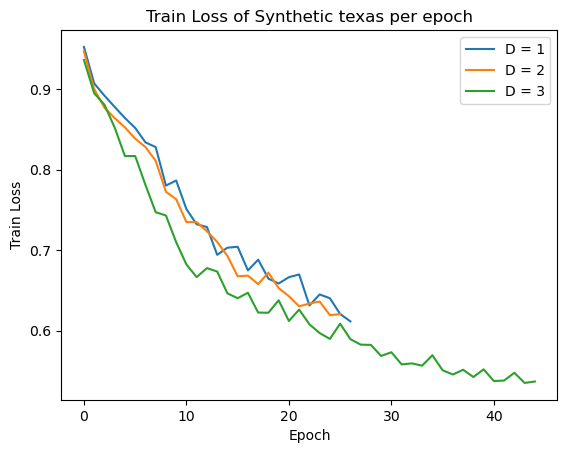

In [9]:
for i in range(len(syn_util.histories)):
    plt.plot(syn_util.histories[i].history['loss'], label=f"D = {syn_util.degrees[i]}")
plt.xlabel("Epoch")
plt.ylabel(f"Train Loss")
plt.title(f"Train Loss of Synthetic {data} per epoch")
plt.legend()
plt.show()

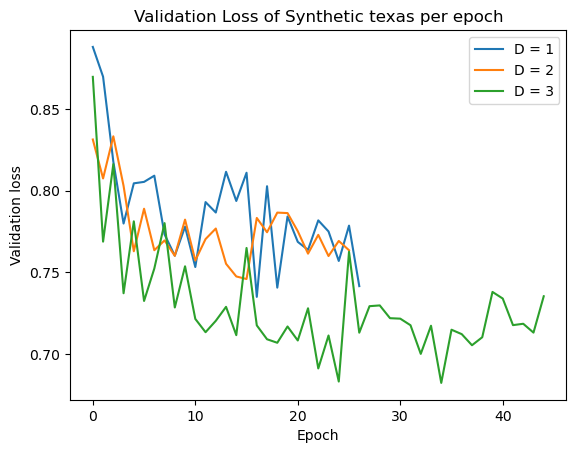

In [10]:
for i in range(len(syn_util.histories)):
    plt.plot(syn_util.histories[i].history['val_loss'], label=f"D = {syn_util.degrees[i]}")
plt.xlabel("Epoch")
plt.ylabel(f"Validation loss")
plt.title(f"Validation Loss of Synthetic {data} per epoch")
plt.legend()
plt.show()

In [12]:
_, X_test, y_test = encodeNonAnonData(data, f"/Users/amirrezasokhankhosh/Documents/Workstation/testing_adult/data/{data}/test.csv")
test_accs = {}
for i in range(len(syn_util.degrees)):
    syn_util.models[i] = tf.keras.models.load_model(f"./syn_weights/model_{data}_{syn_util.degrees[i]}.h5")
    X, y = syn_util.features[i]
    res = syn_util.models[i].evaluate(X_test, y_test, verbose=0)
    test_accs[f"D = {syn_util.degrees[i]}"] = res

Replacing all generalized values...


75555it [00:02, 26080.53it/s]
2023-12-01 17:50:11.589040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-01 17:50:20.502497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-01 17:50:29.335806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Text(0, 0.5, 'MSE Loss')

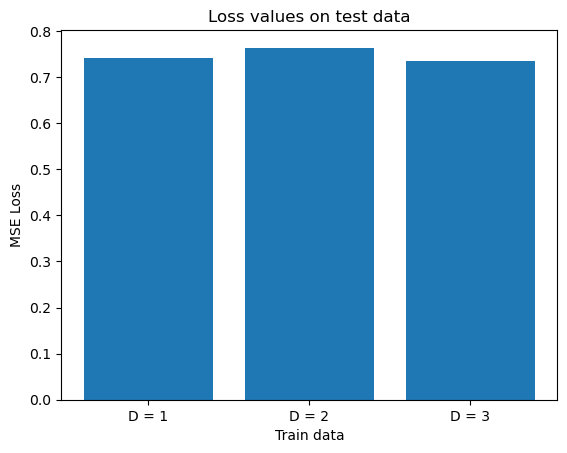

In [14]:
names = [f"D = {d}" for d in degrees]
height = [test_accs[name] for name in names]
plt.bar(names, height)
plt.title("Loss values on test data")
plt.xlabel("Train data")
plt.ylabel("MSE Loss")